In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
df = pd.read_csv("michaels_mlb_cleaned_data.csv")
df

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,pfx_x,pfx_z,nasty,zone,code,type,pitch_type,b_count,s_count,pitch_num
0,-0.390,3.600,91.0,84.2,1972.614,190.202,7.1,3.4,23.8,-3.210,...,-1.77,9.82,53.0,11.0,B,B,FC,1.0,0.0,2.0
1,-0.005,2.257,85.9,80.4,41.087,214.714,-1.0,8.1,23.9,-0.203,...,-0.13,0.14,48.0,5.0,F,S,SL,0.0,0.0,1.0
2,0.820,3.193,94.1,86.7,2376.304,205.009,30.8,3.2,23.8,-9.536,...,-4.96,10.59,58.0,12.0,S,S,FF,2.0,1.0,4.0
3,-0.088,2.358,94.1,87.2,2504.011,216.915,41.2,4.1,23.8,-14.264,...,-7.38,9.78,25.0,5.0,E,X,FF,3.0,2.0,8.0
4,1.370,2.934,92.6,85.7,2235.653,204.604,26.4,3.5,23.8,-8.694,...,-4.64,10.10,24.0,12.0,B,B,FF,2.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.324,1.185,88.7,81.4,2083.680,239.627,30.2,6.8,23.8,-16.057,...,-9.52,5.54,41.0,14.0,B,B,FS,0.0,2.0,3.0
49996,1.000,2.212,92.2,84.9,1711.688,230.264,25.1,5.7,23.8,-12.244,...,-6.65,5.49,70.0,14.0,C,S,FF,0.0,0.0,1.0
49997,-0.403,2.133,94.4,88.2,2234.726,221.635,37.0,4.6,23.9,-14.146,...,-7.20,8.06,37.0,4.0,D,X,FF,0.0,1.0,2.0
49998,0.365,1.991,88.4,81.4,1864.988,227.714,26.4,6.0,23.8,-12.294,...,-7.29,6.58,45.0,9.0,X,X,SI,0.0,1.0,2.0


In [66]:
df = df.astype({'p_throws': 'string', 'code' : "string", "type" : "string", "pitch_type" : "string", 'batter_side' : "string"})
df.dtypes

px              float64
pz              float64
start_speed     float64
end_speed       float64
spin_rate       float64
spin_dir        float64
break_angle     float64
break_length    float64
break_y         float64
ax              float64
ay              float64
az              float64
p_throws         string
sz_bot          float64
sz_top          float64
pitcher_id        int64
batter_side      string
vx0             float64
vy0             float64
vz0             float64
x               float64
x0              float64
y               float64
y0              float64
z0              float64
pfx_x           float64
pfx_z           float64
nasty           float64
zone            float64
code             string
type             string
pitch_type       string
b_count         float64
s_count         float64
pitch_num       float64
dtype: object

In [48]:
df[["p_throws"]].value_counts()

p_throws
R           41693
L            8307
dtype: int64

In [67]:
df[["batter_side"]].value_counts()

batter_side
R              35837
L              14163
dtype: int64

In [68]:
df.pitch_type.unique()

<StringArray>
['FC', 'SL', 'FF', 'CU', 'SI', 'CH', 'FT', 'KN', 'KC', 'FS']
Length: 10, dtype: string

FT - two-seam fastball, SI - sinker, FF - four-seam fastball, CH - Changeup, SL - slider, CU - cutter, IN , FC - , KC - knuck curve 

In [69]:
df[["pitch_type"]].value_counts()

pitch_type
FF            24660
SL             6286
CH             5953
CU             4462
FT             2984
SI             2505
FC             2117
KC              531
FS              369
KN              133
dtype: int64

Looking into end_speed and start_speed, it appears to have very similar information

<AxesSubplot:xlabel='pitch_type', ylabel='end_speed'>

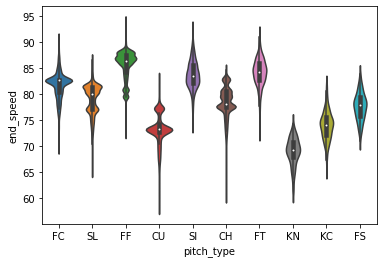

In [70]:
sns.violinplot(x = "pitch_type", y = "end_speed", data=df)

<AxesSubplot:xlabel='pitch_type', ylabel='start_speed'>

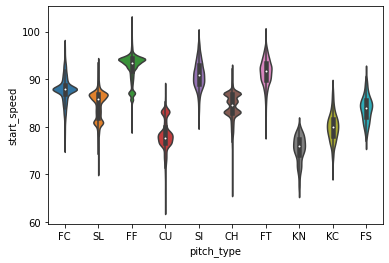

In [71]:
sns.violinplot(x = "pitch_type", y = "start_speed", data=df)

Spinrate is perhaps one of the important metrics in a pitch. Inceasing the spinrate of pitches make them harder to hit. Pitches like a changeup might have less spin rate but pitchers still throw them to mess up batter's timing

<AxesSubplot:xlabel='pitch_type', ylabel='spin_rate'>

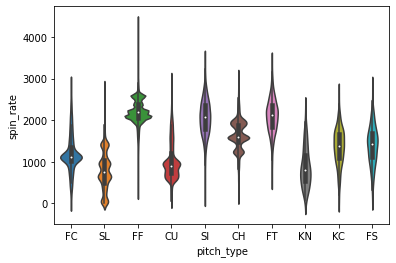

In [72]:
sns.violinplot(x = "pitch_type", y = "spin_rate", data=df)

<AxesSubplot:xlabel='pitch_type', ylabel='spin_dir'>

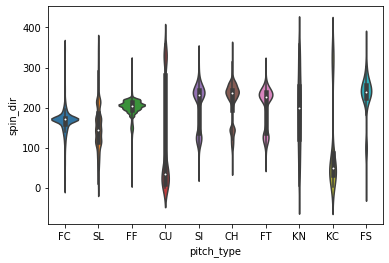

In [137]:
sns.violinplot(x = "pitch_type", y = "spin_dir", data=df)

Essentially how much the pitch moves from its straight line path

<AxesSubplot:xlabel='pitch_type', ylabel='break_length'>

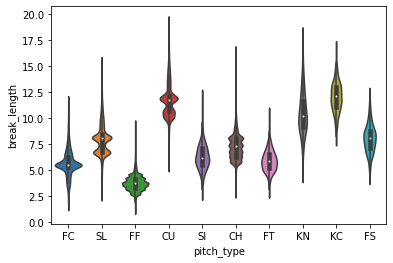

In [154]:
sns.violinplot(x = "pitch_type", y = "break_length", data=df)

This seems more usefull than nasty

<AxesSubplot:xlabel='pitch_type', ylabel='nasty'>

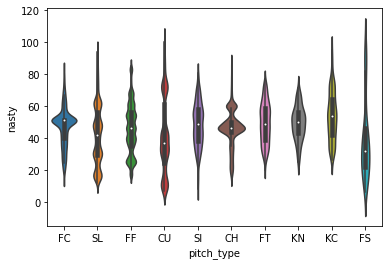

In [155]:
sns.violinplot(x = "pitch_type", y = "nasty", data=df)

Below is me trying to figure out if theres any relation between the pitch and where it is thrown in the strikezone

I dont really like the scatter plot.

There are some really good insights with the location in the strikezone. For example, sliders travel left for a Right handed pitcher (RHP) and right for a LHP. RHPs will throw the slider more towards the left side of the plate, espessially so with Right handed batters (RHB). If a pitchers throws a slider to the outside of the plate there might be a more chance of a hit with a RHB than a LHB as a LHB would be jammed.

For pitches with horizontal movement, px, pz, p_thows, and batter_side might all be valuable attributes for our model.

<AxesSubplot:xlabel='px', ylabel='pz'>

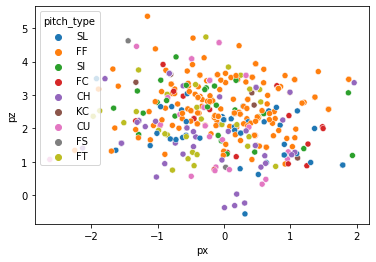

In [56]:
sns.scatterplot(x="px", y="pz", hue="pitch_type", data=df.sample(500))

<AxesSubplot:xlabel='pitch_type', ylabel='px'>

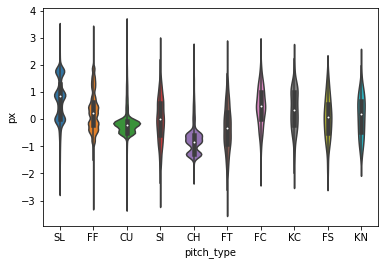

In [74]:
sns.violinplot(x = "pitch_type", y = "px", data=df[(df["p_throws"] == "R") & (df["batter_side"] == "R")])

<AxesSubplot:xlabel='pitch_type', ylabel='px'>

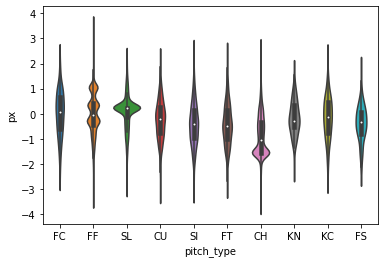

In [75]:
sns.violinplot(x = "pitch_type", y = "px", data=df[(df["p_throws"] == "R") & (df["batter_side"] == "L")])

<AxesSubplot:xlabel='pitch_type', ylabel='px'>

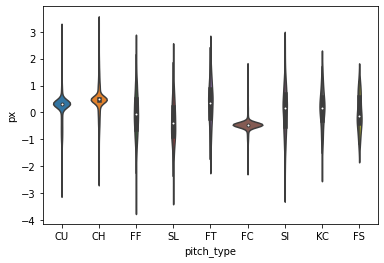

In [76]:
sns.violinplot(x = "pitch_type", y = "px", data=df[(df["p_throws"] == "L") & (df["batter_side"] == "R")])

In [78]:
df[(df["p_throws"] == "L") & (df["batter_side"] == "R")].shape[0]

6325

less data points on LHP vs RHB ^^^

<AxesSubplot:xlabel='pitch_type', ylabel='px'>

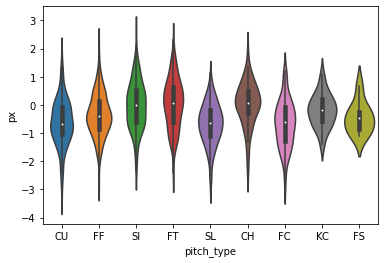

In [77]:
sns.violinplot(x = "pitch_type", y = "px", data=df[(df["p_throws"] == "L") & (df["batter_side"] == "L")])

Below tries to capture location of the strike zone by pitch in 2d:

result: Less separation than 1d

<AxesSubplot:xlabel='px', ylabel='pz'>

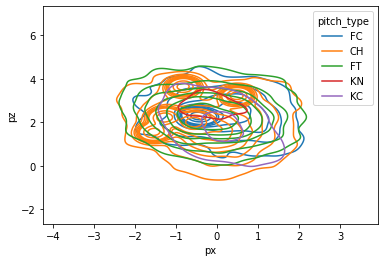

In [147]:
sns.kdeplot(
    data=df[df["pitch_type"].isin(["CH", "FT", "KN", "KC", "FC"])],
    x="px",
    y="pz", 
    hue="pitch_type"
)

<AxesSubplot:xlabel='px', ylabel='pz'>

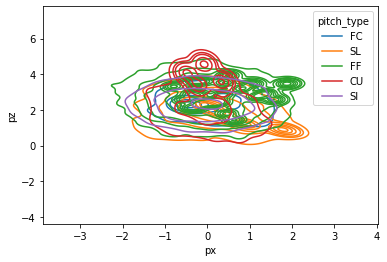

In [148]:
sns.kdeplot(
    data=df[df["pitch_type"].isin(["FC", "SL", "FF", "CU", "SI"])],
    x="px",
    y="pz",
    hue="pitch_type"
)

Pitch height in the strike zone:

some pitches are more evenly distributed than others. 4-seam fastballs are pretty even while changeups are more down in the zone

<AxesSubplot:xlabel='pitch_type', ylabel='pz'>

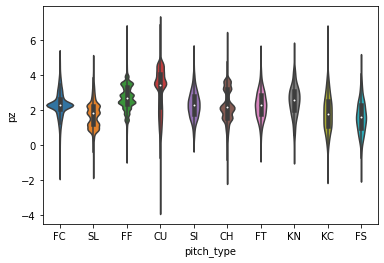

In [58]:
sns.violinplot(x = "pitch_type", y = "pz", data=df)

Below is an investigation into the release position of the pitchers hand. This seems very specific to the pitcher and not the pitch. Therefore should be excluded in the model.

In [83]:
ten_random_pitchers = np.random.choice(df["pitcher_id"], 10)

<AxesSubplot:xlabel='x0', ylabel='z0'>

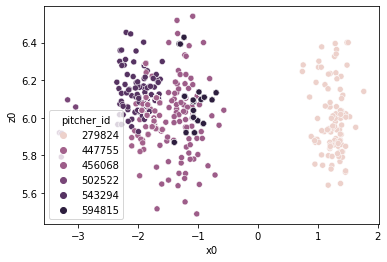

In [89]:
sns.scatterplot(x="x0", y="z0", hue="pitcher_id", data=df[df['pitcher_id'].isin(ten_random_pitchers)])

Below is an investigation into which pitches are thrown at different ball, strike counts:

If zero strike and more balls thrown, the more likely a pitcher will throw a fastball until a 3 and 0 count. This could definitely help with our model

In [125]:
print("normalized percent of pitches thrown for 0 balls and 0 strikes")
df[(df["b_count"] == 0) & (df["s_count"] == 0)]["pitch_type"].value_counts() / df[(df["b_count"] == 0) & (df["s_count"] == 0)].shape[0]

normalized percent of pitches thrown for 0 balls and 0 strikes


FF    0.519364
SL    0.111386
CU    0.083485
CH    0.079125
FC    0.076800
FT    0.062850
SI    0.050207
KC    0.009446
FS    0.004577
KN    0.002761
Name: pitch_type, dtype: float64

In [126]:
print("normalized percent of pitches thrown for 1 balls and 0 strikes")
df[(df["b_count"] == 1) & (df["s_count"] == 0)]["pitch_type"].value_counts() / df[(df["b_count"] == 1) & (df["s_count"] == 0)].shape[0]

normalized percent of pitches thrown for 1 balls and 0 strikes


FF    0.598240
SL    0.172158
FT    0.064689
CH    0.055891
SI    0.049853
FC    0.026738
CU    0.019665
FS    0.005348
KC    0.005348
KN    0.002070
Name: pitch_type, dtype: float64

In [127]:
print("normalized percent of pitches thrown for 2 balls and 0 strikes")
df[(df["b_count"] == 2) & (df["s_count"] == 0)]["pitch_type"].value_counts() / df[(df["b_count"] == 2) & (df["s_count"] == 0)].shape[0]

normalized percent of pitches thrown for 2 balls and 0 strikes


FF    0.674113
FT    0.104468
SI    0.096583
CH    0.042707
SL    0.040736
FC    0.024310
CU    0.009855
KN    0.003942
KC    0.001971
FS    0.001314
Name: pitch_type, dtype: float64

In [128]:
print("normalized percent of pitches thrown for 3 balls and 0 strikes")
df[(df["b_count"] == 3) & (df["s_count"] == 0)]["pitch_type"].value_counts() / df[(df["b_count"] == 3) & (df["s_count"] == 0)].shape[0]

normalized percent of pitches thrown for 3 balls and 0 strikes


FF    0.606557
SI    0.143443
FT    0.143443
FC    0.045082
CH    0.024590
SL    0.016393
CU    0.008197
KN    0.008197
FS    0.004098
Name: pitch_type, dtype: float64

Lets look as strikes increase:

0-1 counts have a variety of off-speed pitches while 0-2 less so

In [130]:
print("normalized percent of pitches thrown for 0 balls and 1 strikes")
df[(df["b_count"] == 0) & (df["s_count"] == 1)]["pitch_type"].value_counts() / df[(df["b_count"] == 0) & (df["s_count"] == 1)].shape[0]

normalized percent of pitches thrown for 0 balls and 1 strikes


FF    0.279295
CU    0.263185
CH    0.187383
SL    0.089537
FT    0.066644
SI    0.047821
FC    0.037477
KC    0.015601
FS    0.010344
KN    0.002713
Name: pitch_type, dtype: float64

In [132]:
print("normalized percent of pitches thrown for 0 balls and 2 strikes")
df[(df["b_count"] == 0) & (df["s_count"] == 2)]["pitch_type"].value_counts() / df[(df["b_count"] == 0) & (df["s_count"] == 2)].shape[0]

normalized percent of pitches thrown for 0 balls and 2 strikes


FF    0.540194
SL    0.132067
CU    0.085247
CH    0.063604
FT    0.057420
SI    0.050795
FC    0.028269
KC    0.025177
FS    0.013251
KN    0.003975
Name: pitch_type, dtype: float64

Lets look at some common mixed counts:

In [133]:
print("normalized percent of pitches thrown for 1 balls and 2 strikes")
df[(df["b_count"] == 1) & (df["s_count"] == 2)]["pitch_type"].value_counts() / df[(df["b_count"] == 1) & (df["s_count"] == 2)].shape[0]

normalized percent of pitches thrown for 1 balls and 2 strikes


FF    0.297138
SL    0.190657
CH    0.126263
CU    0.122896
FT    0.078283
SI    0.066077
FC    0.051768
KC    0.034512
FS    0.026936
KN    0.005471
Name: pitch_type, dtype: float64

In [134]:
print("normalized percent of pitches thrown for 2 balls and 2 strikes")
df[(df["b_count"] == 2) & (df["s_count"] == 2)]["pitch_type"].value_counts() / df[(df["b_count"] == 2) & (df["s_count"] == 2)].shape[0]

normalized percent of pitches thrown for 2 balls and 2 strikes


FF    0.397696
SL    0.319794
CH    0.071234
SI    0.052440
CU    0.049409
FT    0.049106
FC    0.032737
FS    0.013034
KC    0.012125
KN    0.002425
Name: pitch_type, dtype: float64

In [135]:
print("normalized percent of pitches thrown for 2 balls and 1 strikes")
df[(df["b_count"] == 2) & (df["s_count"] == 1)]["pitch_type"].value_counts() / df[(df["b_count"] == 2) & (df["s_count"] == 1)].shape[0]

normalized percent of pitches thrown for 2 balls and 1 strikes


FF    0.693878
FT    0.071807
SI    0.066138
CH    0.063492
SL    0.044974
FC    0.030234
CU    0.017007
KC    0.006425
FS    0.003779
KN    0.002268
Name: pitch_type, dtype: float64

In conclusion, we should definitely use ball/strike counts when building our model

Now I will look into acceration attributes:

There appears to be separation here as well

<AxesSubplot:xlabel='ax', ylabel='az'>

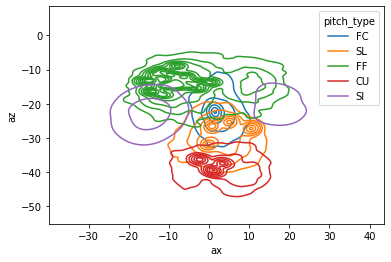

In [142]:
sns.kdeplot(
    data=df[df["pitch_type"].isin(["FC", "SL", "FF", "CU", "SI"])],
    x="ax",
    y="az",
    hue="pitch_type"
)

<AxesSubplot:xlabel='ax', ylabel='az'>

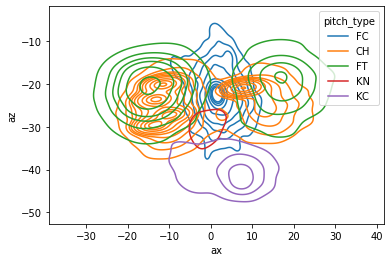

In [143]:
sns.kdeplot(
    data=df[df["pitch_type"].isin(["CH", "FT", "KN", "KC", "FC"])],
    x="ax",
    y="az",
    hue="pitch_type"
)

Now we will do the same for initial velocity:

Less separation but still useful perhaps

<AxesSubplot:xlabel='vx0', ylabel='vz0'>

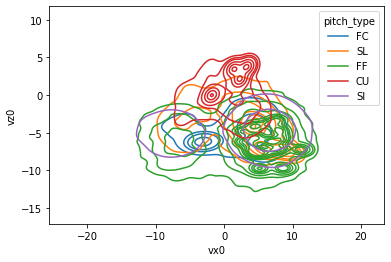

In [145]:
sns.kdeplot(
    data=df[df["pitch_type"].isin(["FC", "SL", "FF", "CU", "SI"])],
    x="vx0",
    y="vz0",
    hue="pitch_type"
)

<AxesSubplot:xlabel='vx0', ylabel='vz0'>

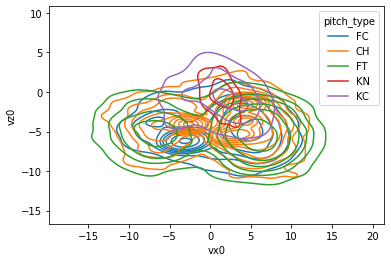

In [146]:
sns.kdeplot(
    data=df[df["pitch_type"].isin(["CH", "FT", "KN", "KC", "FC"])],
    x="vx0",
    y="vz0",
    hue="pitch_type"
)

Looking into horizontal Deviation: then same for RHP AND LHP

<AxesSubplot:xlabel='pitch_type', ylabel='pfx_x'>

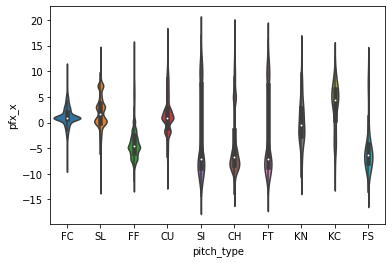

In [149]:
sns.violinplot(x = "pitch_type", y = "pfx_x", data=df)

<AxesSubplot:xlabel='pitch_type', ylabel='pfx_x'>

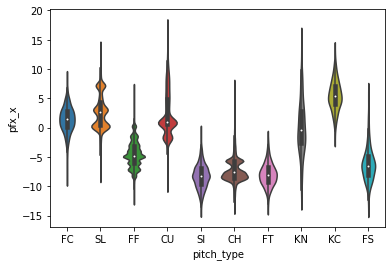

In [150]:
sns.violinplot(x = "pitch_type", y = "pfx_x", data=df[(df["p_throws"] == "R")])

<AxesSubplot:xlabel='pitch_type', ylabel='pfx_x'>

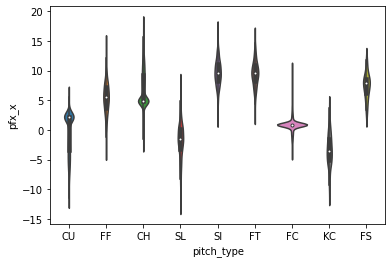

In [151]:
sns.violinplot(x = "pitch_type", y = "pfx_x", data=df[(df["p_throws"] == "L")])

Next Vertical Deviation

<AxesSubplot:xlabel='pitch_type', ylabel='pfx_z'>

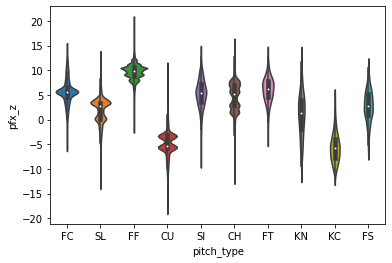

In [152]:
sns.violinplot(x = "pitch_type", y = "pfx_z", data=df)